# COMP3222/6246 Machine Learning Technologies (2022/23)
## Lab 3 – Decision Trees, Random Forests, Ensemble Learning

Follow each code block at your own pace, you can have a look at the book or ask questions to demonstrators if you find something confusing.

# Chapter 6 - Decision Trees
"_Decision Trees_ are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks." [Geron2017] 

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt    
import numpy as np

np.random.seed(42) # to ensure our results exactly like the book

## 6.1 Training and Visualizing a Decision Tree

First, let's load the iris dataset from sci-kit learn library.

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

In [4]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### 6.1.1 Determine Targets

Let's determine which columns will be in our interest and print them.

In [5]:
X = iris.data[:, 2:] # only focus on petal length and width
Y = iris.target
feature_names = iris.feature_names[2:]
print("given:",feature_names, 
      "\npredict whether:", iris.target_names)


given: ['petal length (cm)', 'petal width (cm)'] 
predict whether: ['setosa' 'versicolor' 'virginica']


### Exercise 6.1.1: Plot the data set
Plot the data set and have a look at the two features that are selected.

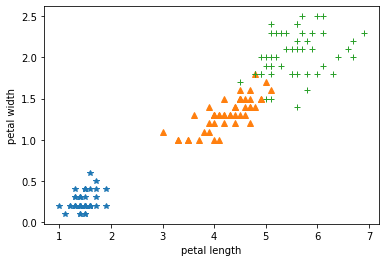

In [6]:
import matplotlib.pyplot as plt
color_map = ["*", "^", "+"]
for idx, name in enumerate(iris.target_names):
    plt.plot(X[:, 0][Y==idx],X[:, 1][Y==idx], color_map[idx],label=name)
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()

### 6.1.2 Train the dataset
Without separating the dataset as we did in previous labs, let's use all the data set and train the decision tree.

In [7]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,Y)

DecisionTreeClassifier(max_depth=2)

There are many hyperparameters that a decision tree classifier has. You can see from the ouput above the parameters that will be used for predictions. Two criterions that you can use with decision trees in sci-kit learn.  These metrics are calculated in each node of decision tree.
* **Gini impurity** `criterion='gini'` is a measure of how often a randomly chosen element from a set would be incorrectly labeled. Formally it is computed by:
$$
I_G(p) = \sum_{i=1}^{J} p_i \sum_{k \neq i} p_k
$$
where $J$ denotes classes and $p_i$ is the fraction of items which are labeled with class $i$. For a concrete example have a look: https://stats.stackexchange.com/a/339514
* **Information Gain** `criterion='entropy'` is a mesaure of entropy, which is used in thermodynamics as a measure of molecular disorder. Entropy=0 means the molecules are well ordered.   
$$
H(T) = I_E(p)=-\sum_{i=1}^{J}p_i\log_2 p_i
$$
$p_1, p_2, ...$ as in gini impurity are the fractions that add up to 1. 

These two metrics are used for deciding the splits while training a decision tree.

### Exercise 6.1.2: Gini or Entropy
* Should you use Gini impurity or entropy?
* Which one is faster to compute and why?
* Visualize the tree that you trained above in 6.1.2. 
  * Why does _gini impurity_ metric decrease in deeper nodes? 
  * Which cases do you see that the metric is zero?

*Your answer here*

### 6.1.2 Visualization

You can export the decision tree as a `dot` file from sci-kit learn. You can convert `dot` to `png` image by installing `graphviz`.

In [8]:
from sklearn.tree import export_graphviz
file = "iris_tree"
export_graphviz(tree_clf,
                out_file= file+".dot",
                feature_names=feature_names,
                class_names=iris.target_names,
                rounded=True,
                filled=True
               )

In [9]:
# Make sure you installed graphviz (exclamation mark is for shell commands)
# !apt install graphviz 

# Convert dot file to png file.
!dot -Tpng iris_tree.dot -o iris_tree.png



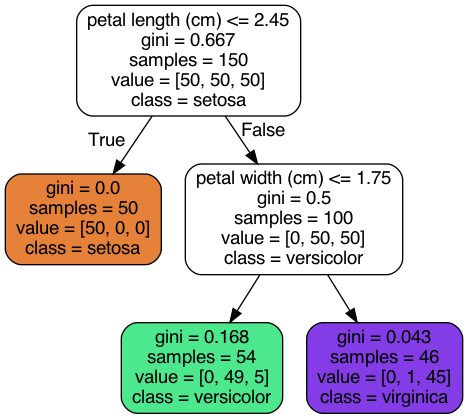

In [10]:
from IPython.display import Image
Image(filename='iris_tree.png') 

To see a better visualization example of decision trees, have a look at [this page](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/).

### Extra: Another way to visualize decision trees

There is a brand new visualization library from creators of ANTLR (parser generator) for decision trees called [`dtreeviz`](https://github.com/parrt/dtreeviz). You can find [some other examples](https://github.com/parrt/dtreeviz/blob/master/notebooks/examples.ipynb) from their repository for better visualization. Follow the steps below:

In [11]:
# install the package
%pip install dtreeviz
# (optional)
%apt-get install msttcorefonts -qq


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


UsageError: Line magic function `%apt-get` not found.


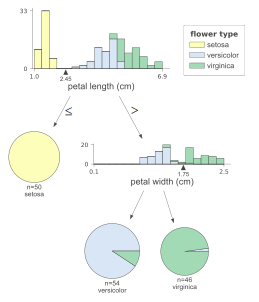

In [12]:
from dtreeviz.trees import dtreeviz
import matplotlib as mpl

mpl.rcParams['axes.facecolor'] = 'white'
viz = dtreeviz(tree_clf,
              X,
              Y,
              target_name='flower type',
              feature_names=feature_names, 
              class_names=list(iris.target_names),
              fancy=True, 
              orientation ='TD')

# uncomment this            
viz

### 6.1.3 Plot training data set

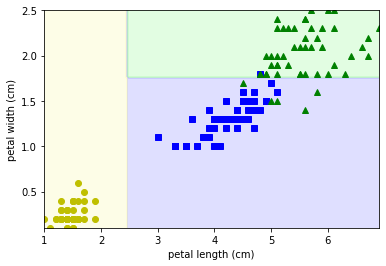

In [13]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
CUSTOM_CMAP = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
 
# helper function to plot the boundaries
def plot_decision_boundary(clf, x, y):
    color_map = ["yo", "bs", "g^"]
    for target_index, target_name in enumerate(iris.target_names):
        plt.plot(x[:, 0][y==target_index], # petal length on X axis (the ones that equal to target)
                 x[:, 1][y==target_index], # petal width on Y axis (the ones that equal to target)
                 color_map[target_index], 
                 label=target_name)
        
    x1s = np.linspace(np.min(x[:, 0]), np.max(x[:, 0]), 100)
    x2s = np.linspace(np.min(x[:, 1]), np.max(x[:, 1]), 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    x_test = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(x_test).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=CUSTOM_CMAP)

plot_decision_boundary(tree_clf, X, Y)

plt.xlabel(feature_names[0]) # petal length (cm)
plt.ylabel(feature_names[1]) # petal width (cm)
plt.show()

### Exercise 6.1: Plot decision boundaries
1. Write down which colour correspond to which node in the decision tree.
2. Try to increase/decrease `max_depth` of decision tree classifier and observe the changes in the decision boundaries. What would you set `max_depth`?
3. If the helper function (`plot_decision_boundary`) was not available to you, how would you visualize the decision boundaries? Tip:  try to create X's that ranges from $[1, 0]$ to $[7, 2.5]$ where. You can use:  


In [14]:
# check np.mgrid[minX1:maxX1:increment, minX2:maxX2:increment]
X = np.mgrid[1:7:0.1, 0:2.5:0.1].reshape(2,-1).T
X

array([[1. , 0. ],
       [1. , 0.1],
       [1. , 0.2],
       ...,
       [6.9, 2.2],
       [6.9, 2.3],
       [6.9, 2.4]])

### Exercise 6.1a: Solution

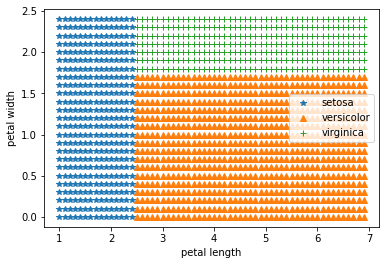

In [15]:
# Tip: try each point in the space 
color_map = ["*", "^", "+"]
Y = tree_clf.predict(X)
for idx, name in enumerate(iris.target_names):
    plt.plot(X[:,0][Y==idx], X[:,1][Y==idx], color_map[idx], label=name)
plt.legend()
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()

### 6.1.4 Estimating Class Probabilities
To estimate the probability of an instance belongs to a class, you can use `predict_proba`, to determine the class that an instance will be assigned to use `predict`. 

In [16]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [17]:
tree_clf.predict([[5, 1.5]])

array([1])

### 6.1.5 Regularization Hyperparameters
"Constraining a model to make it simpler and reduce the risk of overfitting is called _regularization"  [Geron2017, page 27]  To avoid [overfitting](https://en.wikipedia.org/wiki/Overfitting), you can limit the generation of a node by `min_samples_leaf` (the minimum samples that a node must have to able to be splitted.). 


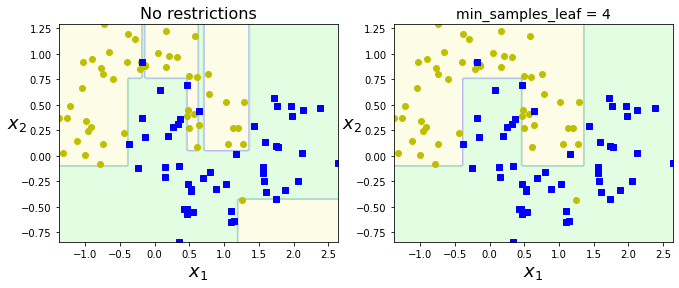

In [18]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)

plt.xlabel(r"$x_1$", fontsize=18)
plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
plot_decision_boundary(deep_tree_clf1, Xm, ym)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)

plt.xlabel(r"$x_1$", fontsize=18)
plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
plot_decision_boundary(deep_tree_clf2, Xm, ym)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)


plt.show()

## 6.2 Regression

Decision trees can be used for regression tasks too. Instead of predicting a class, in regression tasks, the aim is to predict a numberic value (such as the price of a car). Assume that we have this quadratic data set with some noise:

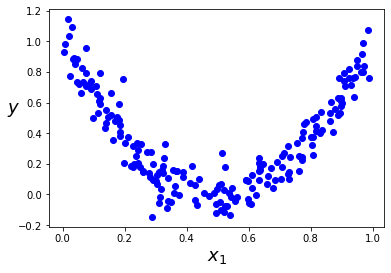

In [19]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
Y = y + np.random.randn(m, 1) / 10

plt.plot(X, Y, "bo")
plt.xlabel("$x_{1}$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.show()

In [20]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,Y)

DecisionTreeRegressor(max_depth=2)

### Exercise 6.2: Visualize the regression tree 

1. Visualize the regression tree same as before with _graphviz_.
2. Plot this regression tree (Tip: try many values for x (e.g. `np.linspace(min, max, noOfPoints)`)
3. Plot the decision boundaries of `max_depth=2` and `max_depth=3` regression trees (also try `min_samples_leaf=10`)
4. Compare the differences on the difference plots. Notice that the average is taken in the regions which are separated by the decision tree regressor.

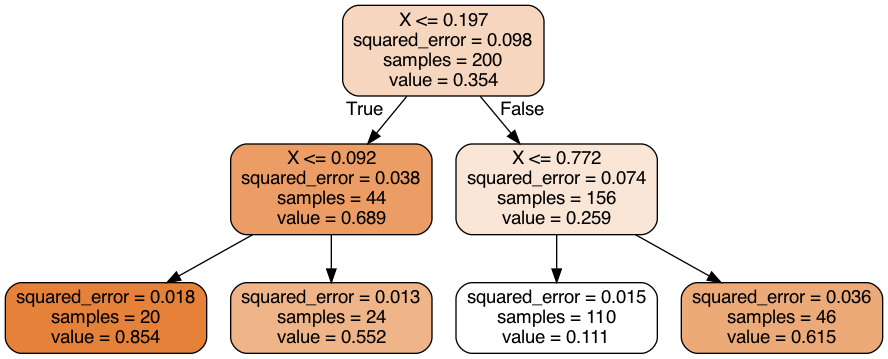

In [21]:
# # Tips for 6.2.2:
# Xs = np.linspace(0, 1, 100)
# Xs
# # predict Y values for Xs and plot

export_graphviz(tree_reg,
                out_file= "reg_tree.dot",
                feature_names=["X"],
                class_names=["Y"],
                rounded=True,
                filled=True
               )


!dot -Tpng reg_tree.dot -o reg_tree.png

from IPython.display import Image
Image(filename='reg_tree.png')

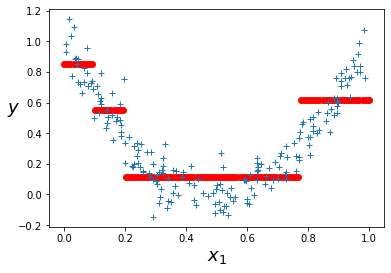

In [26]:
Xs = np.linspace(0, 1, 100).reshape(-1,1)
Ys = tree_reg.predict(Xs)
plt.plot(Xs, Ys, "ro")
plt.plot(X, Y, "+")
plt.xlabel("$x_{1}$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.show()

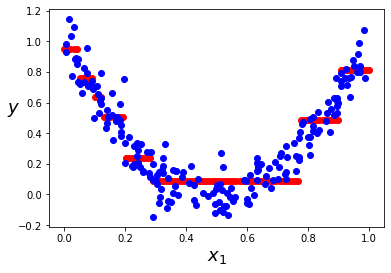

In [27]:
tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(X, Y)
Xs = np.linspace(0, 1, 100).reshape(-1,1)
Ys = tree_reg.predict(Xs)
plt.plot(Xs, Ys, "ro")
plt.plot(X, Y, "bo")
plt.xlabel("$x_{1}$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.show()

# Chapter 7: Ensemble Learning and Random Forests

Instead of using a single predictor, to improve our predictions we use now use _an ensemble_: **a group of predictors**. It is as if you are asking a number of experts opinion about a problem and you aggregate their answers.

## 7.1 Voting Classifiers

A brief comparision between `soft` voting and `hard` voting with using three predictors.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, Y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

Helper function for printing accuracies on test set

In [30]:
from sklearn.metrics import accuracy_score
def test_clfs(*clfs): # clf -> classifier
    for clf in clfs:
        clf.fit(X_train, Y_train) # train the classifier
        Y_pred = clf.predict(X_test)
        print(clf.__class__.__name__ + ":", accuracy_score(Y_test, Y_pred))

Let's test `hard` voting first.

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Don't worry about the warnings, 
# sci-kit community will be fixing it in the next major version 0.20.0 
    
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42, probability=True)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), 
                                          ('rf', rnd_clf), 
                                          ('svc', svm_clf)],
                              voting='hard')
test_clfs(log_clf, rnd_clf, svm_clf, voting_clf)

LogisticRegression: 0.864
RandomForestClassifier: 0.896
SVC: 0.896
VotingClassifier: 0.912


### Exercise 7.1: Which voting to pick?
1. Check the `soft` voting and compare the results. Why do you think it is different? 

_If you don't know the difference have a look at your book, page 186._

**Your answer here:**

In [32]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42, probability=True)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), 
                                          ('rf', rnd_clf), 
                                          ('svc', svm_clf)],
                              voting='soft')
test_clfs(log_clf, rnd_clf, svm_clf, voting_clf)

LogisticRegression: 0.864
RandomForestClassifier: 0.896
SVC: 0.896
VotingClassifier: 0.92


## 7.2 Bagging & Pasting
Instead of giving training set to each predictor in our ensemble, another approach to gain more accuracy is to separate the training set and give a different training subset to each predictor. There are two ways: 
* **Bagging:** (_bootstrapping in statistics_) picking a random subset from training set and not removing this selected set from training set for each predictor, i.e. **sampling with replacement**
* **Pasting:** picking a random subset from training set and removing this selected set from the training set for each predictor, i.e. **sampling without replacement**
If you are still confused, have a look at [here](http://www.statisticshowto.com/sampling-with-replacement-without/).

Bagging Classifier
0.904
Decision Tree Classifier
0.856


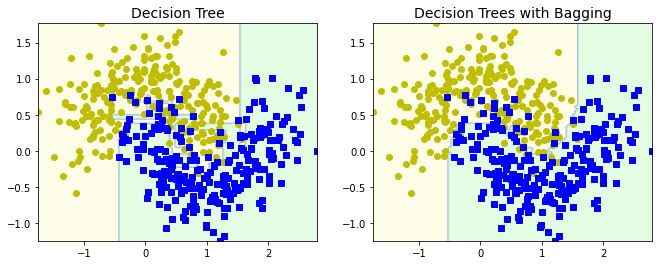

In [33]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# define our decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)
# 500 copies of the predictor, which has 100 samples from training set
# n_jobs=-1 for utilizing all cores 
bag_clf = BaggingClassifier(tree_clf, 
                            n_estimators=500, 
                            max_samples=100, 
                            bootstrap=True, 
                            n_jobs=-1, 
                            random_state=42)

# fit the bagging classifier
bag_clf.fit(X_train, Y_train)
tree_clf.fit(X_train, Y_train)

Y_pred_bag = bag_clf.predict(X_test)
Y_pred_tree = tree_clf.predict(X_test)

from sklearn.metrics import accuracy_score
print("Bagging Classifier")
print(accuracy_score(Y_test, Y_pred_bag))
print("Decision Tree Classifier")
print(accuracy_score(Y_test, Y_pred_tree))

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, Y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, Y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

### 7.2 Exercise: Bagging or Pasting
* What is the difference between these two techniques which select a subset of a training set?
* When do you think it is better to use bagging or pasting?


Bootstraping introduces a bit more diversity in the subsets that each predictor is trained on. Overall, bagging often results in better models.

## 7.3 Gradient Boosting
In Gradient Boosting, we start with a single predictor. Sequentially, we add new predictors to _an ensemble_ that corrects its predecessor. In detail:

The algorithm is for `3 predictors` in our ensemble:
1. Pick a set of weak predictors (e.g. DecisionTreeRegressor(max_depth=2))
    - For this example, it is `3`.
2. Train the initial predictor on training set
3. Train the second predictor on residual errors (use only errors, i.e. `y2 = y - predictor1.predict(X)`)
3. Train the third predictor on the residual errors of the second predictor
4. Use all predictors and sum their predictions (if regression)

### Exercise 7.3: Implement, Plot and Compare
1. Implement this boosting technique that is explained above with `n` predictors.
    - Use the `quadratic training set` as a regression task.
    - Use `DecisionTreeRegressor(max_depth=2)` as a weak predictor
2. For $n=3$, plot step by step the evolution of the ensemble predictions
    - First figure with only one predictor
    - Second figure with two predictors
    - Third figure with three predictors 
3. Use sci-kit learn's `GradientBoostingRegressor` and compare if your results are similiar.
4. Do you think this boosting technique is scalable in practice? 

Tips:
-  **Plotting**: this is similar as before in Regression section 6.2, as explained earlier.
-  **GradientBoostingRegressor**: use this code snippet:
```python
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X,Y)
```

In [34]:
np.random.seed(42)
X = np.random.rand(100,1 )- 0.5
y = 3*X[:,0]**2 +0.05 * np.random.rand(100)

In [36]:
tree_reg1 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
tree_reg1.fit(X,y)

y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
tree_reg2.fit(X,y2)

y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth = 2, random_state = 42)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

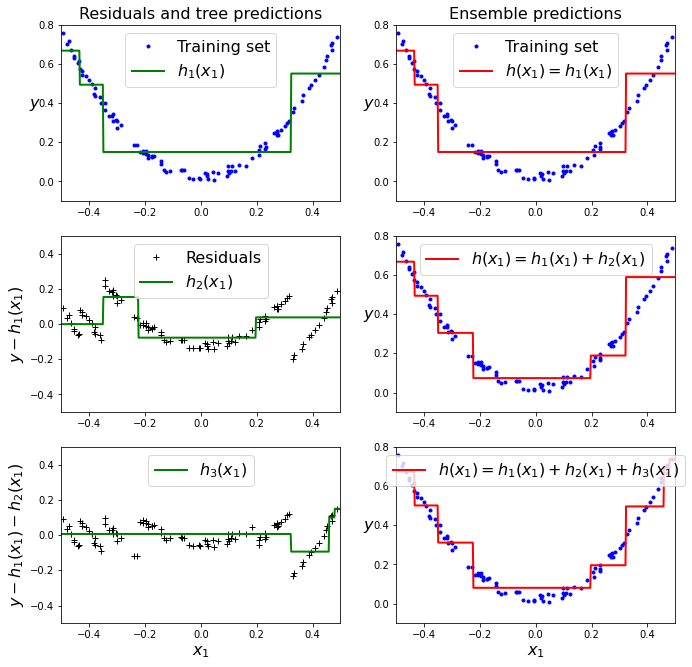

In [37]:
def plot_pred(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)


plt.figure(figsize=(11,11))

plt.subplot(321)
plot_pred([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_pred([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_pred([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_pred([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_pred([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_pred([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

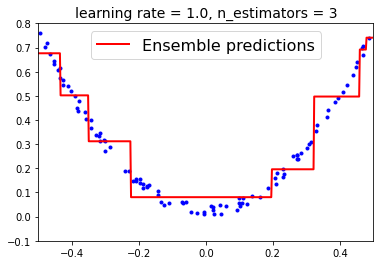

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

grad_reg = GradientBoostingRegressor(max_depth=2, n_estimators = 3, learning_rate=1.0, random_state=42)
grad_reg.fit(X,y)

plot_pred([grad_reg], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning rate = {}, n_estimators = {}".format(grad_reg.learning_rate, grad_reg.n_estimators), fontsize=14)
plt.show()

# plot_pred([grad_reg], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
# plt.title("learning_rate={}, n_estimators={}".format(grad_reg.learning_rate, grad_reg.n_estimators), fontsize=14)
# plt.show()

## Recap

At this point, we demonstrated these concepts:

* training and visualizing various models from Decision Trees and Ensemble Learning
* details about some hyperparameters and how to regularize the models
* different training methods for ensemble learning
* how a boosting technique works and its properties.

Of course, there are some material that we have not be able to cover. In your free time, it can be better to have a look at:

* **Decision Trees**
  * How hard is it to find the best split to construct the _optimal tree_? 
  * Why is CART algorithm called _a greedy algorithm_?
* **Ensemble Learning and Random Forests**
  * Difference between Extra-Trees and Random Forests
  * How does AdaBoost work?
  * Learning Feature Importance with Random Forests
  * What is `Stacking`?
